<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Exploratory Data Analysis Global Terrorism Data</span>  </h1> 

In the previous phase, we meticulously cleaned, engineered features, and wrangled the raw Global Terrorism data, saving the refined dataset as "GTD_cleaned.csv."

Now, we embark on Exploratory Data Analysis (EDA) to delve into individual variables, study relationships between pairs, and unravel complex interactions among multiple variables. The goal is to extract valuable insights that illuminate patterns and guide informed conclusions about the data. Let's navigate this insightful journey through our refined data, seeking to uncover its hidden stories and unlock its potential for impactful analysis.

In [1]:
## Importing packages for analysis

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)   # display all columns without any truncation
pd.set_option('display.expand_frame_repr', False) # the DataFrame will not be displayed in a single line 
                                                    # and may span multiple lines for better readability.
    
pd.set_option('max_colwidth', None)  # the entire content of each column will be displayed without truncation

import matplotlib.pyplot as plt   # for visualisations
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # a filter to ignore all warnings generated in the code 

'''ensures that all plots generated 
using Matplotlib will be displayed within the notebook interface as static images '''

%matplotlib inline 

In [2]:
df = pd.read_csv('GTD_cleaned.csv')
print(f'Our data has {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

Our data has 209706 rows and 45 columns.


,Year,Month,Day,Extended Incident?,Country,Region,Province / Administrative Region / State,City,Latitude,Longitude,Vicinity,"POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL","INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)",OUTSIDE INTERNATIONAL HUMANITARIAN LAW,Doubt if Terrorism?,Part of Multiple Incident,Successful Attack,Suicide Attack,Attack Type,Target/Victim Type,Target/Victim Subtype,Name of Entity,Specific Target/Victim,Nationality of Target/Victim,Perpetrator Group Name,First Perpetrator Group Suspected/Unconfirmed?,Number of Perpetrators Captured,Claim of Responsibility?,Weapon Type,Weapon Sub-type,Total Number of Fatalities,Number of US Fatalities,Number of Perpetrator Fatalities,Total Number of Injured,Number of US Injured,Number of Perpetrators Injured,Property Damage,Hostages or Kidnapping Victims,Data Collection,International- Logistical,International- Ideological,International- Miscellaneous,International- Any of the above,Name of Month,Date
0,1970,7,2,No,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,No,Yes,Yes,Yes,No,No,Yes,No,Assassination,Private Citizens & Property,Named Civilian,Missing Info,Julio Guzman,Dominican Republic,MANO-D,No,-99,Unknown,Unknown,Missing Info,1,-99,-99,0,-99,-99,No,No,PGIS,No,No,No,No,July,1970-07-02
1,1970,5,15,No,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,No,Yes,Yes,Yes,No,No,Yes,No,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,No,-99,Unknown,Unknown,Missing Info,0,-99,-99,0,-99,-99,No,Yes,PGIS,No,Yes,Yes,Yes,May,1970-05-15
2,1970,1,26,No,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,No,Yes,Yes,Yes,No,No,Yes,No,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,No,-99,Unknown,Unknown,Missing Info,1,-99,-99,0,-99,-99,No,No,PGIS,unknown,unknown,Yes,Yes,January,1970-01-26
3,1970,1,3,No,Greece,Western Europe,Attica,Athens,37.997490,23.762728,No,Yes,Yes,Yes,No,No,Yes,No,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Missing Info,U.S. Embassy,United States,Unknown,No,-99,Unknown,Explosives,Unknown Explosive Type,-99,-99,-99,-99,-99,-99,Yes,No,PGIS,unknown,unknown,Yes,Yes,January,1970-01-03
4,1970,1,11,No,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,No,Yes,Yes,Yes,Variable omitted during data collection,No,Yes,No,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Missing Info,U.S. Consulate,United States,Unknown,No,-99,Unknown,Incendiary,Missing Info,-99,-99,-99,-99,-99,-99,Yes,No,PGIS,unknown,unknown,Yes,Yes,January,1970-01-11


In [3]:
num_cols = list(df.select_dtypes('int64').columns)  # Selecting numerical columns
cat_cols = list(df.select_dtypes('object').columns)  # Selecting categorical columns

In [4]:
print(num_cols)

['Year', 'Month', 'Day', 'Number of Perpetrators Captured', 'Total Number of Fatalities', 'Number of US Fatalities', 'Number of Perpetrator Fatalities', 'Total Number of Injured', 'Number of US Injured', 'Number of Perpetrators Injured']


- As we know the description of each numerical column

<AxesSubplot: >

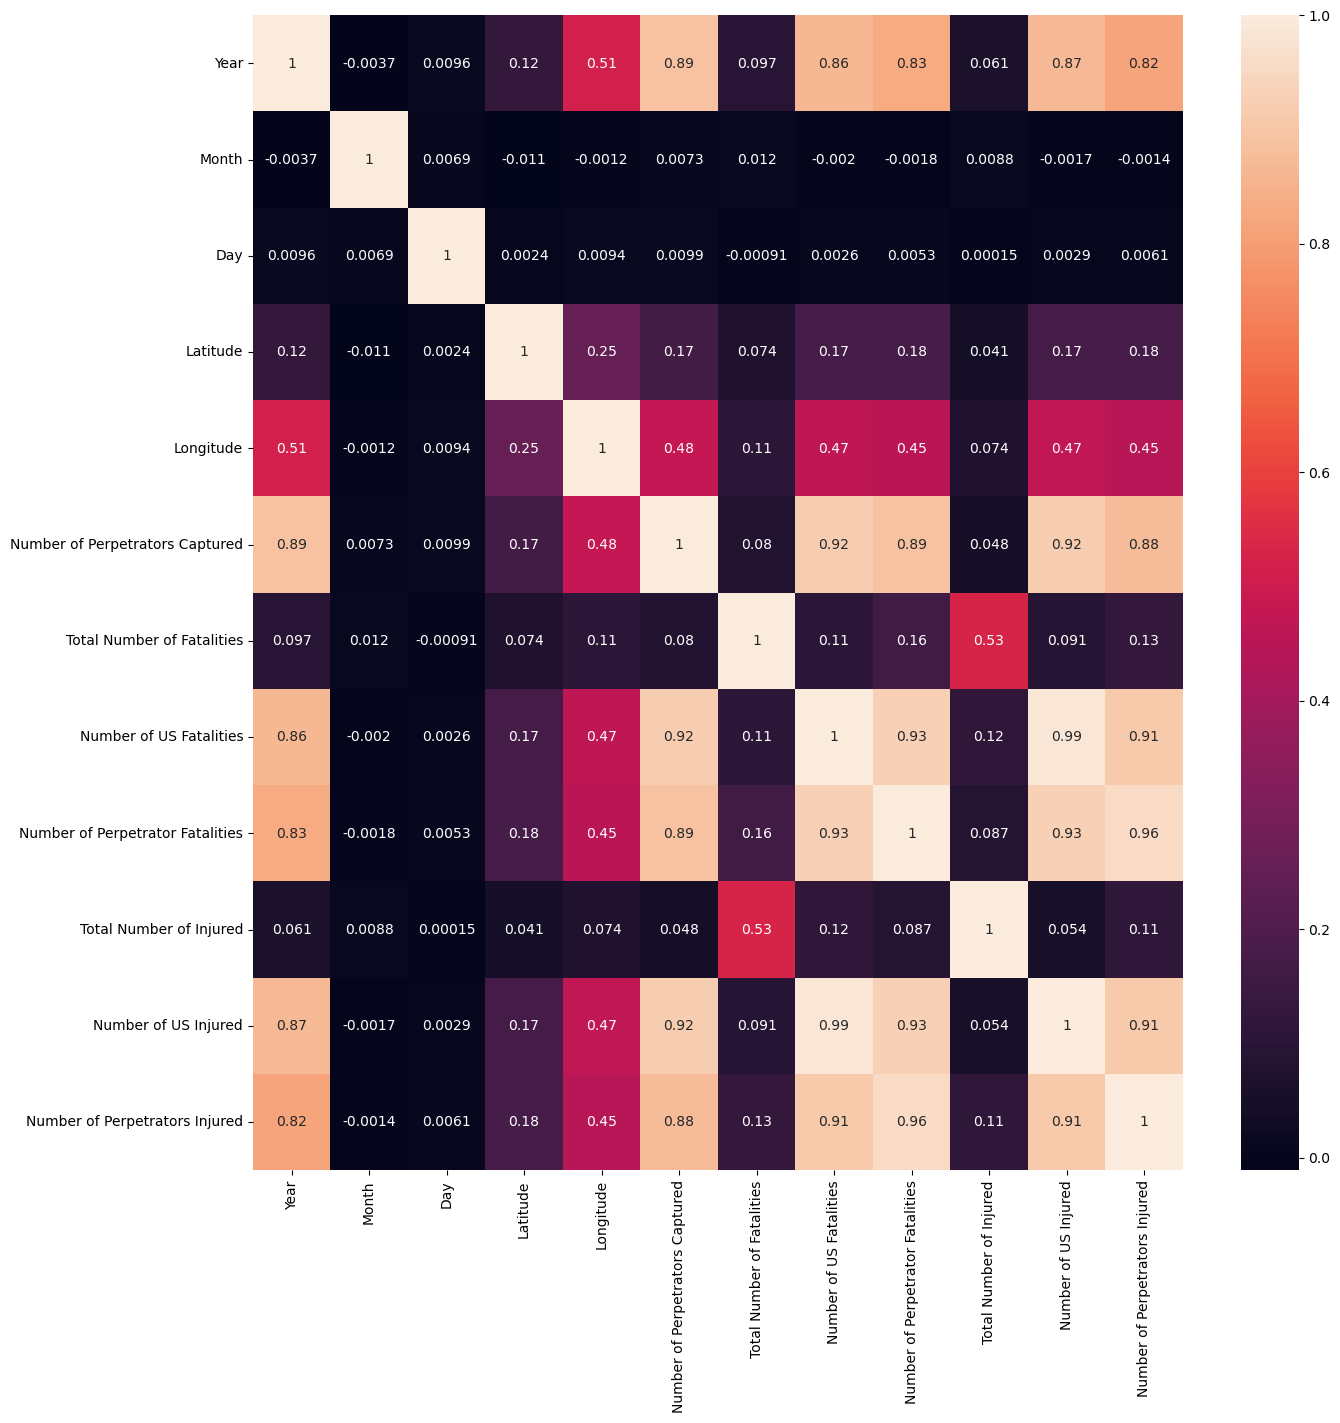

In [5]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), annot=True)

- It can be observed that **several numeric columns have high correlation with other numeric columns**.
- But we remember that all the **missing values** in numeric columns were **imputed with single value, i.e., "-99"**, which has artificially **lead to high degree of correlation** between these columns.
- Thus, **using correlation** as a method to understand the relationship **between these columns is not reliable**.
- For our further analysis, we would exclude the rows with missing values and then use a desired method to understand the relationships better.

- Let us have a look at number of attacks over the years to understand the relationship between them better.

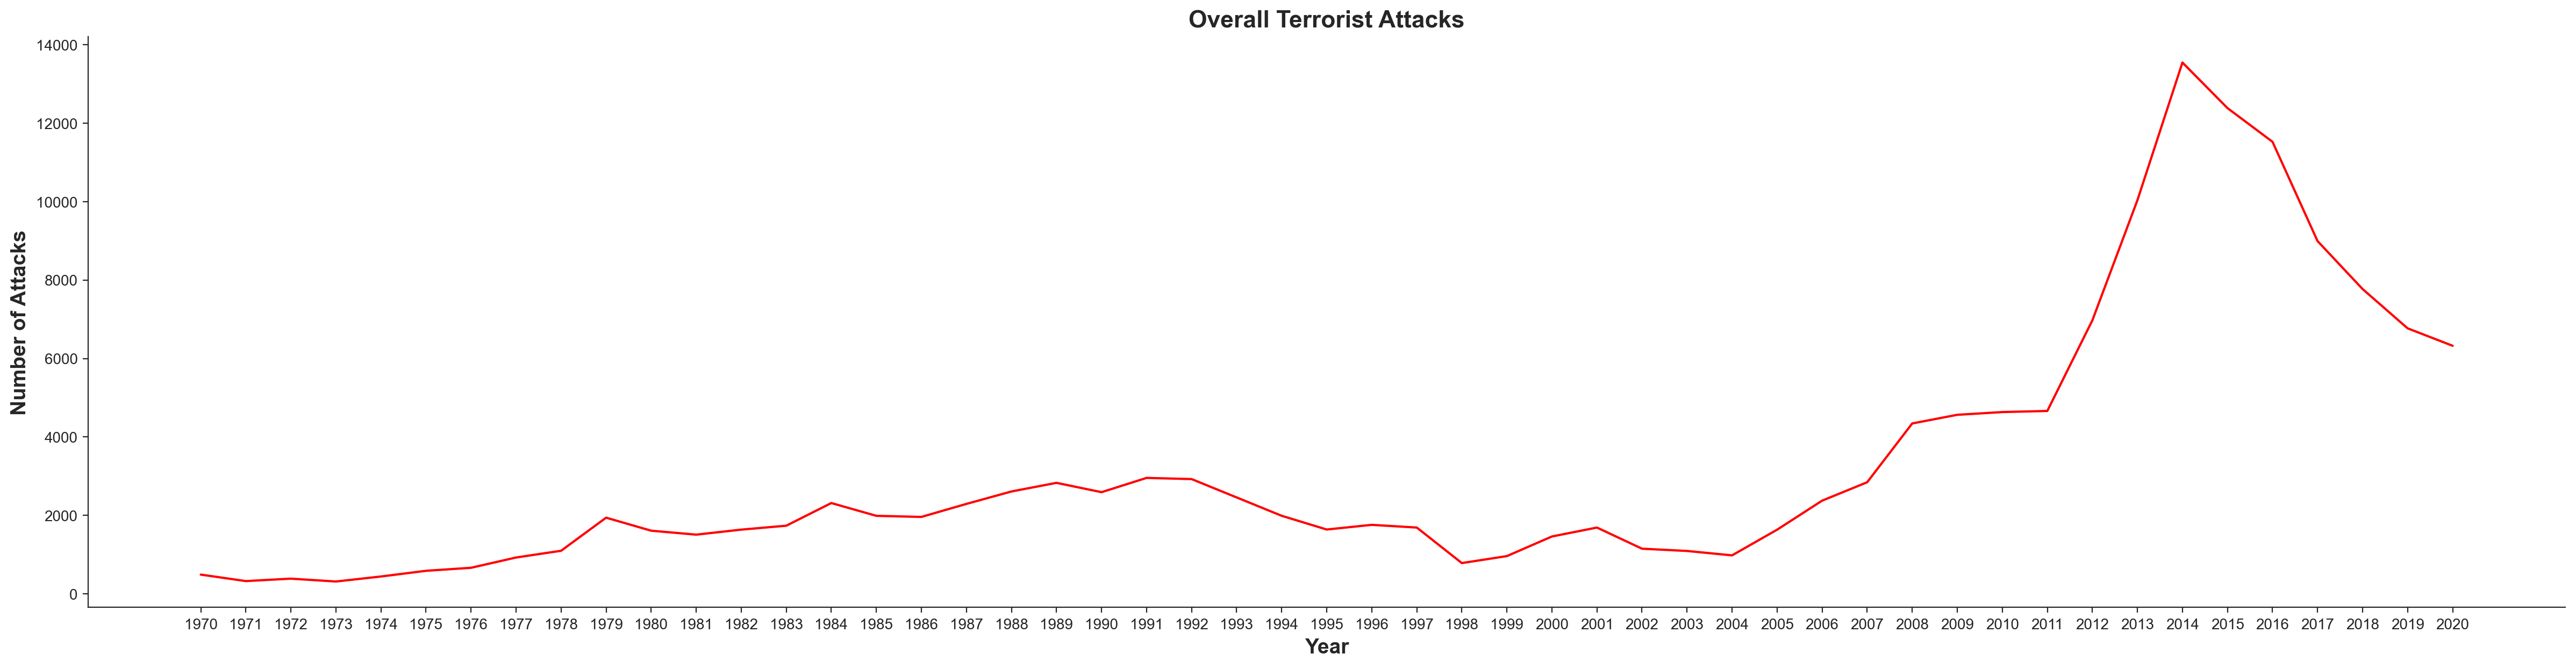

In [31]:
''' Taking only attacks which are terrorism attacks for sure'''
# Setting the size and DPI
%config InlineBackend.figure_format = 'retina'  # For high-resolution displays
sns.set_style('ticks')
year_attack_count = df[df['Doubt if Terrorism?'] == 'No'].groupby('Year')['Year'].count()
sns.relplot(x='Year', y=year_attack_count.values, kind='line', data=year_attack_count, height = 6, aspect=4, color='red')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Attacks', fontweight='bold', fontsize=14)
plt.title('Overall Terrorist Attacks',fontsize=16, fontweight='bold')
plt.show()

**Number of terrorist attack increase gradually till 2014, where there were maximum terrorist attacks and after 2014, number of attacks started to decrease**

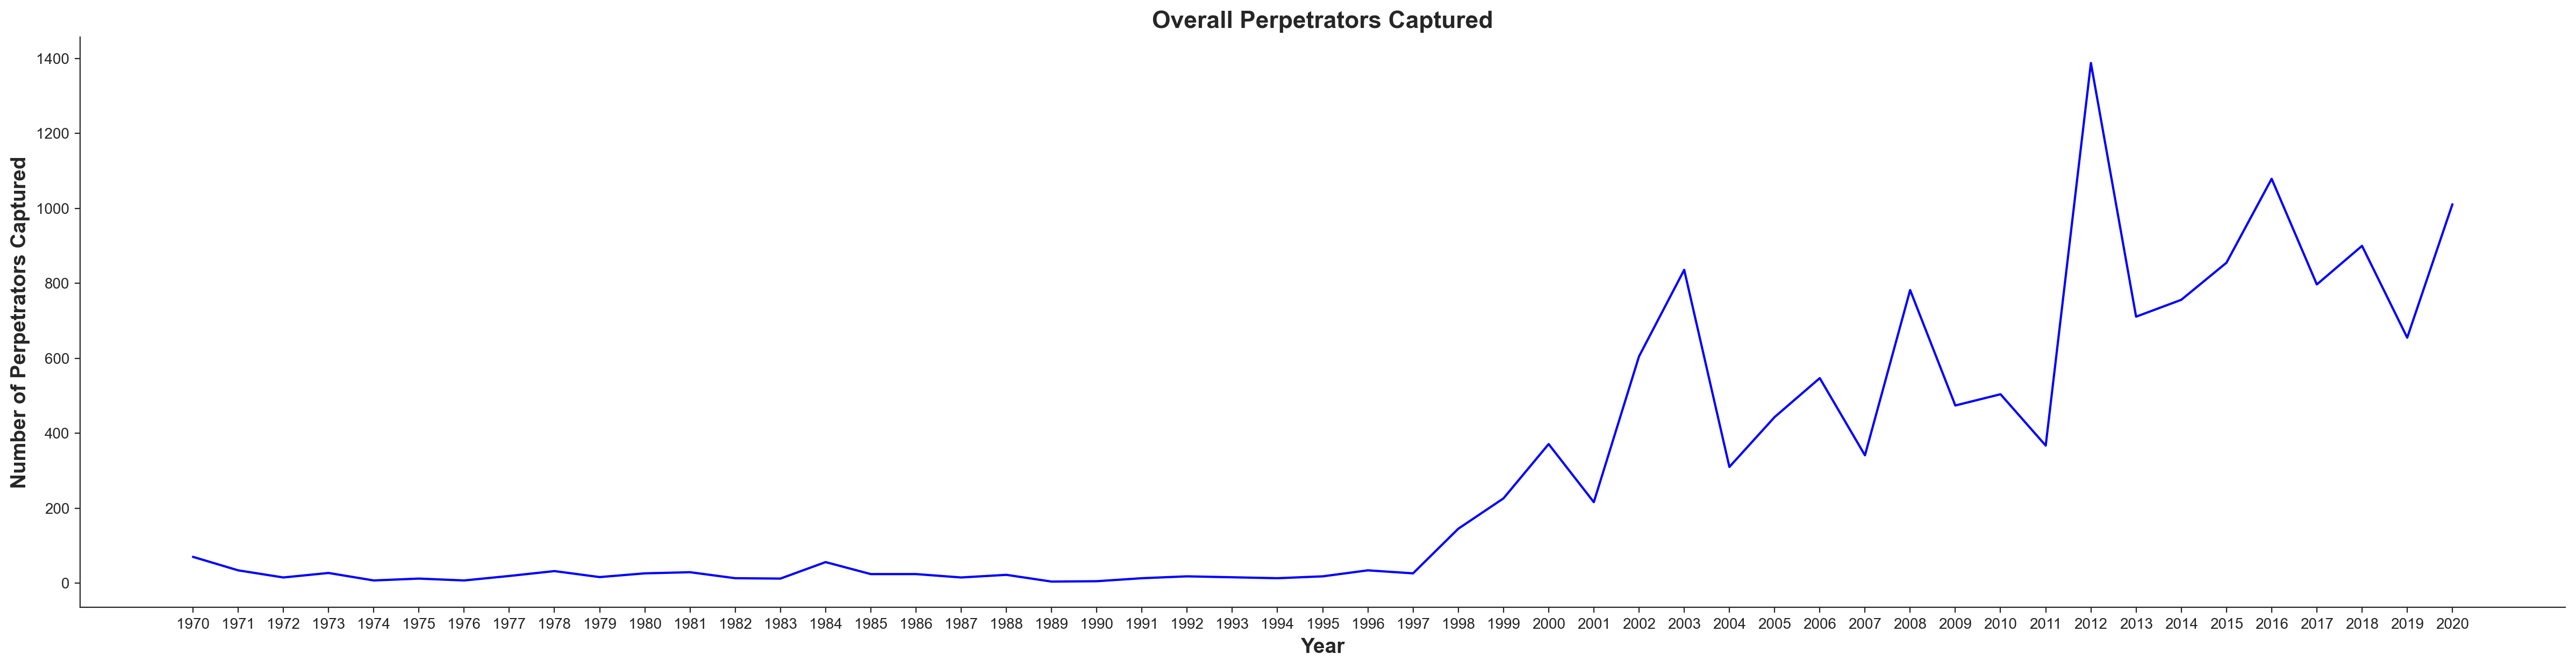

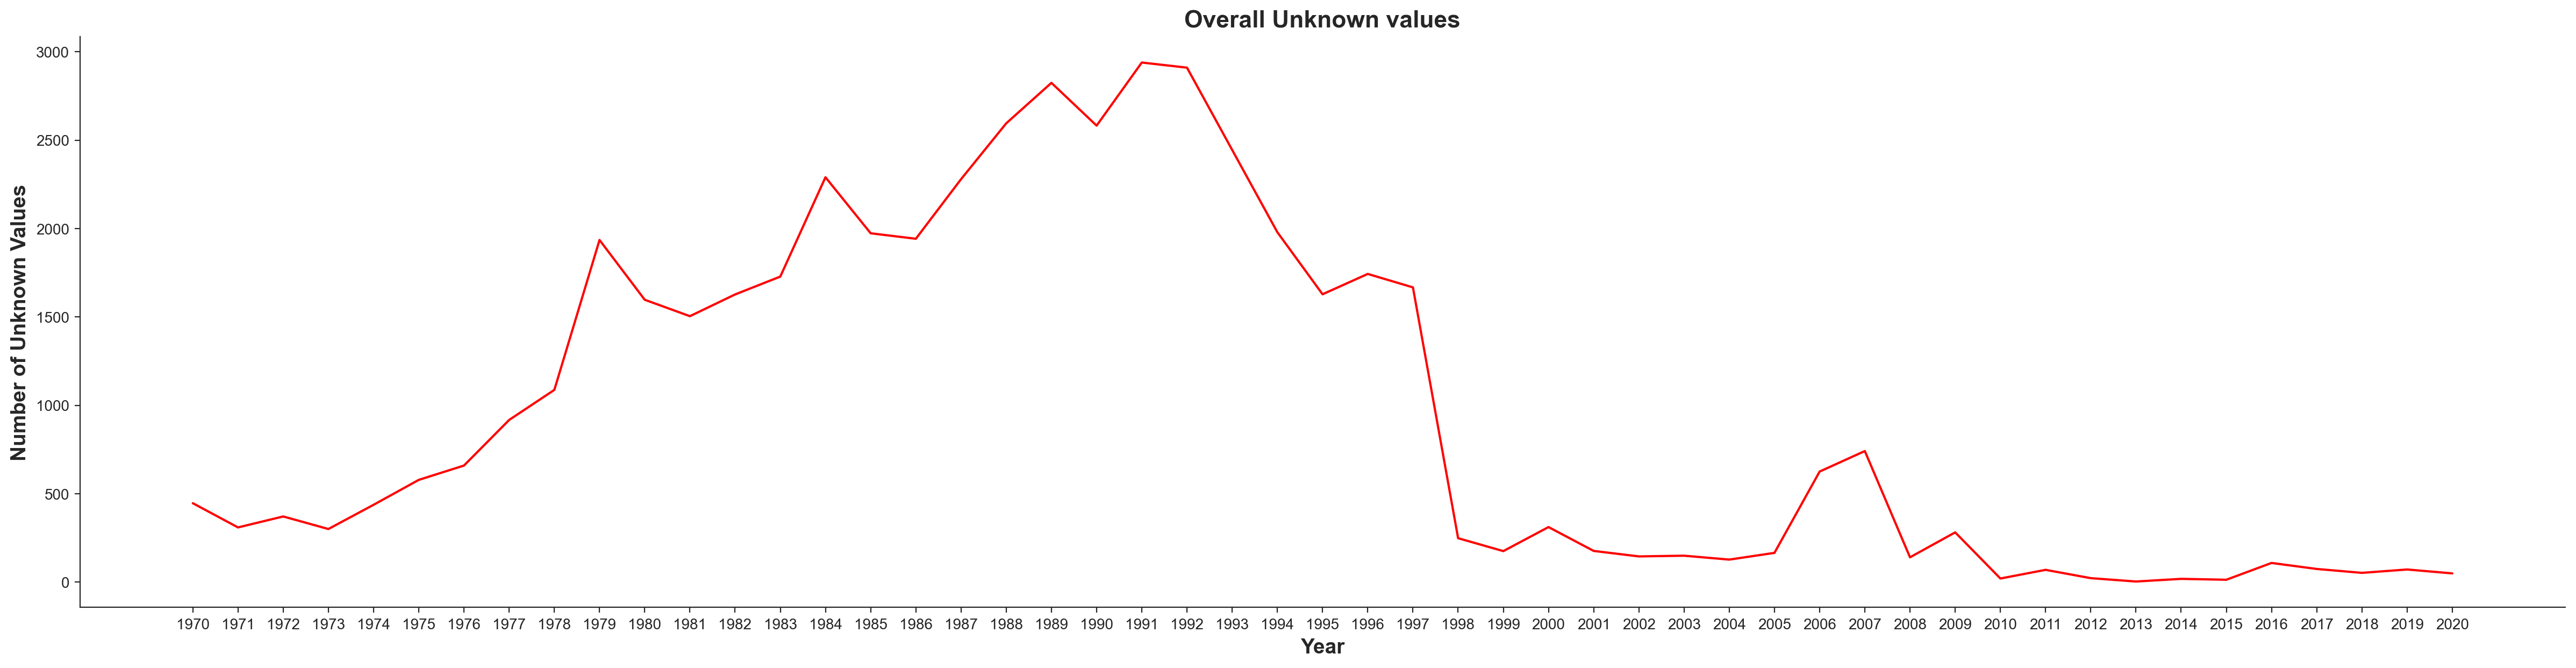

In [71]:
## Discarding Missing values in "Number of Perpetrators Captured" column

year_num_per_cap = df[(df['Number of Perpetrators Captured'] != -99) & (df['Doubt if Terrorism?'] == 'No')]\
.groupby('Year')['Number of Perpetrators Captured'].sum()  ## Summing number of perpetrators captured for each year

sns.relplot(x='Year', y=year_num_per_cap.values, kind='line', data=year_num_per_cap, height = 6, aspect=4, color='blue')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Perpetrators Captured', fontweight='bold', fontsize=14)
plt.title('Overall Perpetrators Captured',fontsize=16, fontweight='bold')
plt.show()

## Looking at missing value years

year_num_per_cap_missing = df[(df['Number of Perpetrators Captured'] == -99) & (df['Doubt if Terrorism?'] == 'No')].groupby('Year')['Year'].count()
sns.relplot(x='Year', y=year_num_per_cap_missing.values, kind='line', data=year_num_per_cap_missing, height = 6, aspect=4, color='red')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Unknown Values', fontweight='bold', fontsize=14)
plt.title('Overall Unknown values',fontsize=16, fontweight='bold')
plt.show()

- In the first plot, **Number of perpetrators captured has increased over the year maximising at 2012 and fluctuating after that**.
- In the first plot, it can be observed that there were **no perpetrators captured till 1997**, which is strange because there were attacks between **0-4000** till 1998.
- To understand better, we made a lineplot to look at all unknown values in "Number of Perpetrators Captured" column and observed that **number of unknown values increases and lies between a range of 700-5000 till the year 1998** which indicates that **<u>number of perpetrators captured might not have been recorded for these years leading to "missing" or "unknown" values"</u>**.

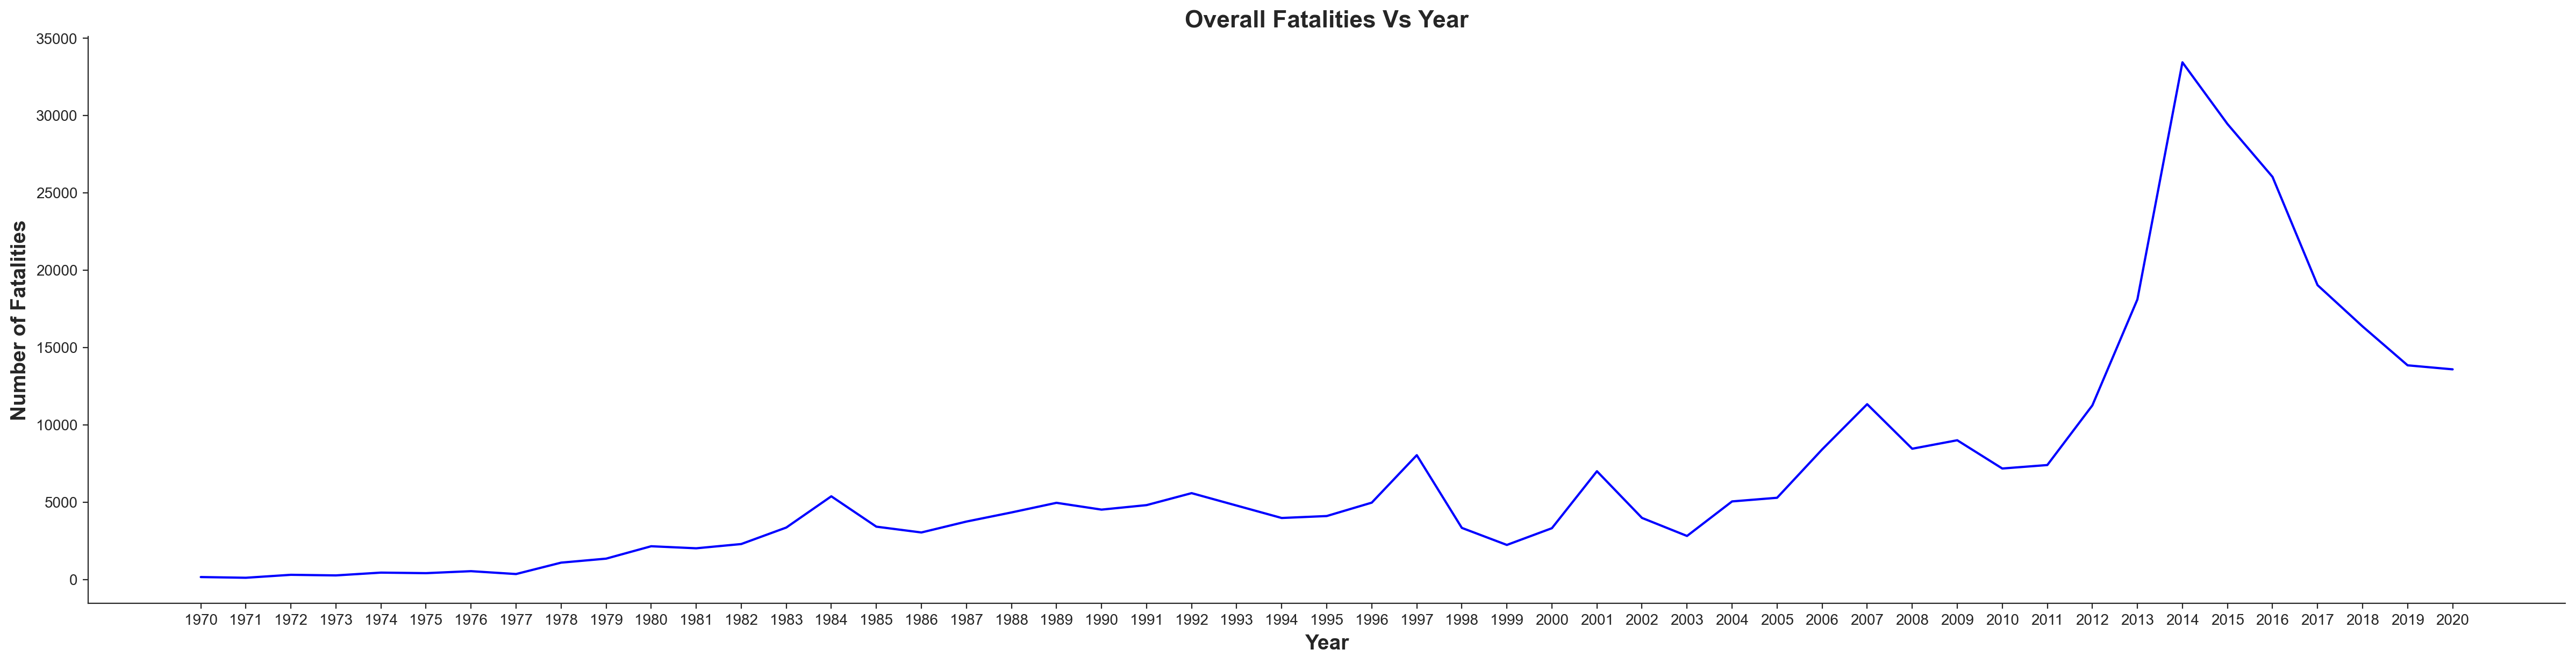

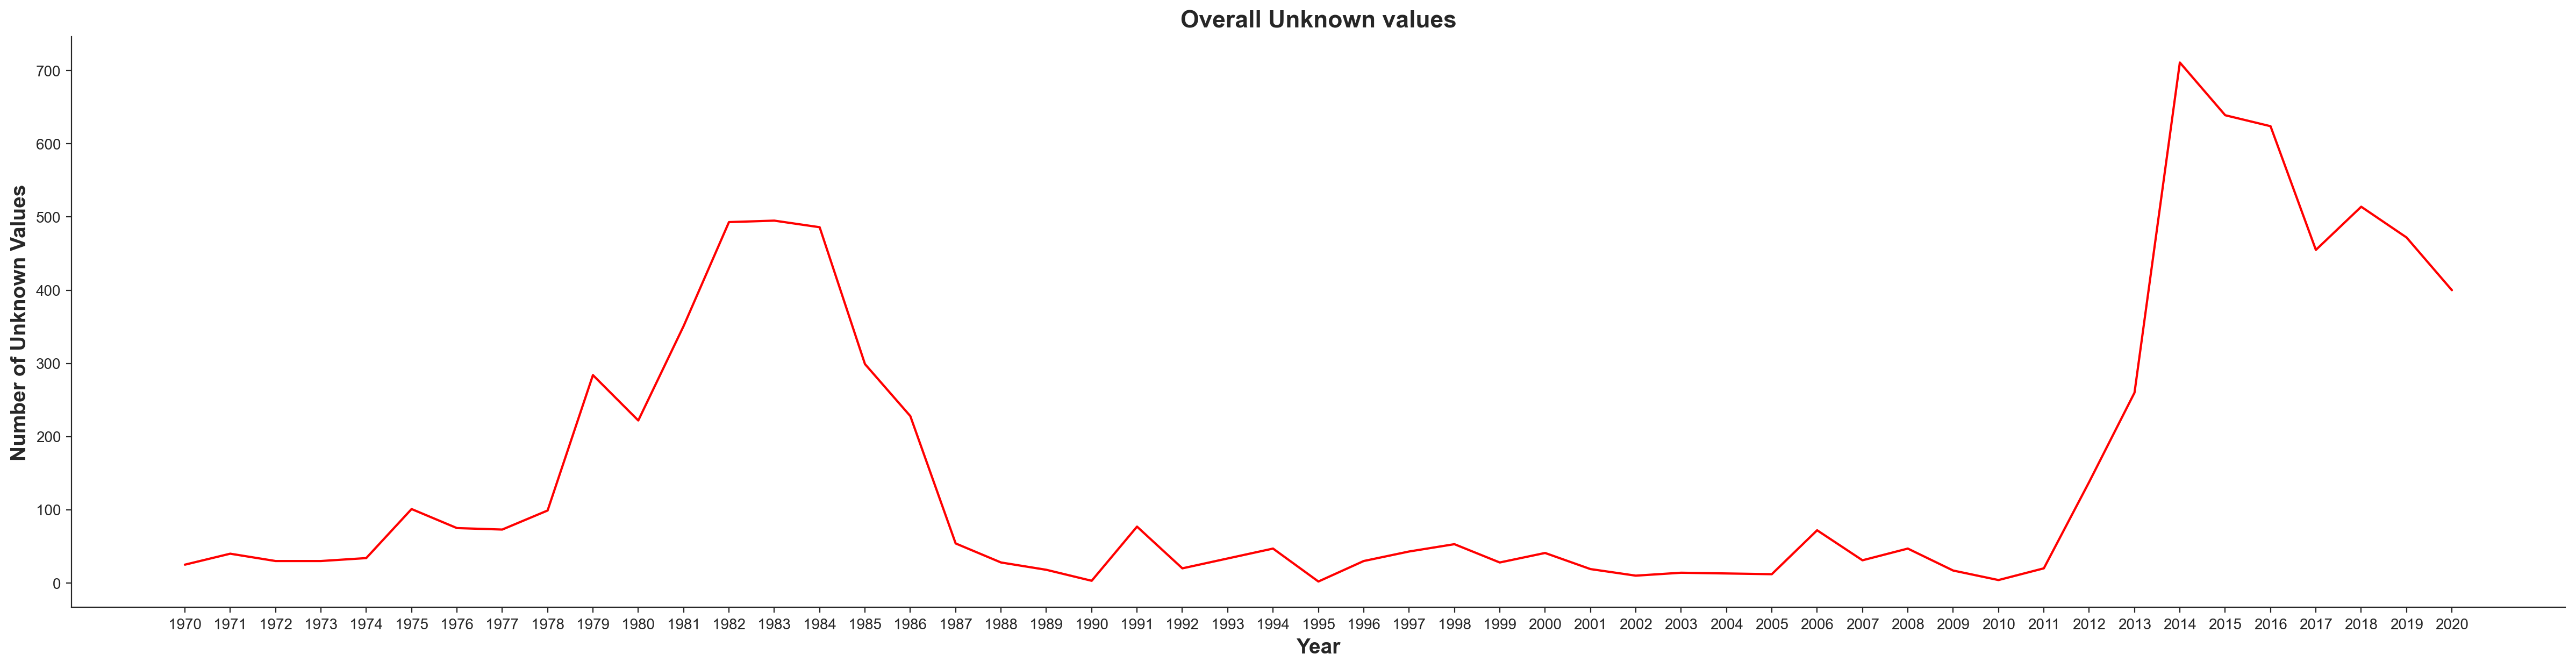

In [72]:
## Discarding Missing values in "Total Number of Fatalities" column

year_num_per_cap = df[(df['Total Number of Fatalities'] != -99) & (df['Doubt if Terrorism?'] == 'No')].\
groupby('Year')['Total Number of Fatalities'].sum()  ## Summing the total number of fatalities for each year

sns.relplot(x='Year', y=year_num_per_cap.values, kind='line', data=year_num_per_cap, height = 6, aspect=4, color='blue')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Fatalities', fontweight='bold', fontsize=14)
plt.title('Overall Fatalities Vs Year',fontsize=16, fontweight='bold')
plt.show()

## Looking at missing value years

year_num_per_cap_missing = df[(df['Total Number of Fatalities'] == -99) & (df['Doubt if Terrorism?'] == 'No')].groupby('Year')['Year'].count()
sns.relplot(x='Year', y=year_num_per_cap_missing.values, kind='line', data=year_num_per_cap_missing, height = 6, aspect=4, color='red')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Unknown Values', fontweight='bold', fontsize=14)
plt.title('Overall Unknown values',fontsize=16, fontweight='bold')
plt.show()

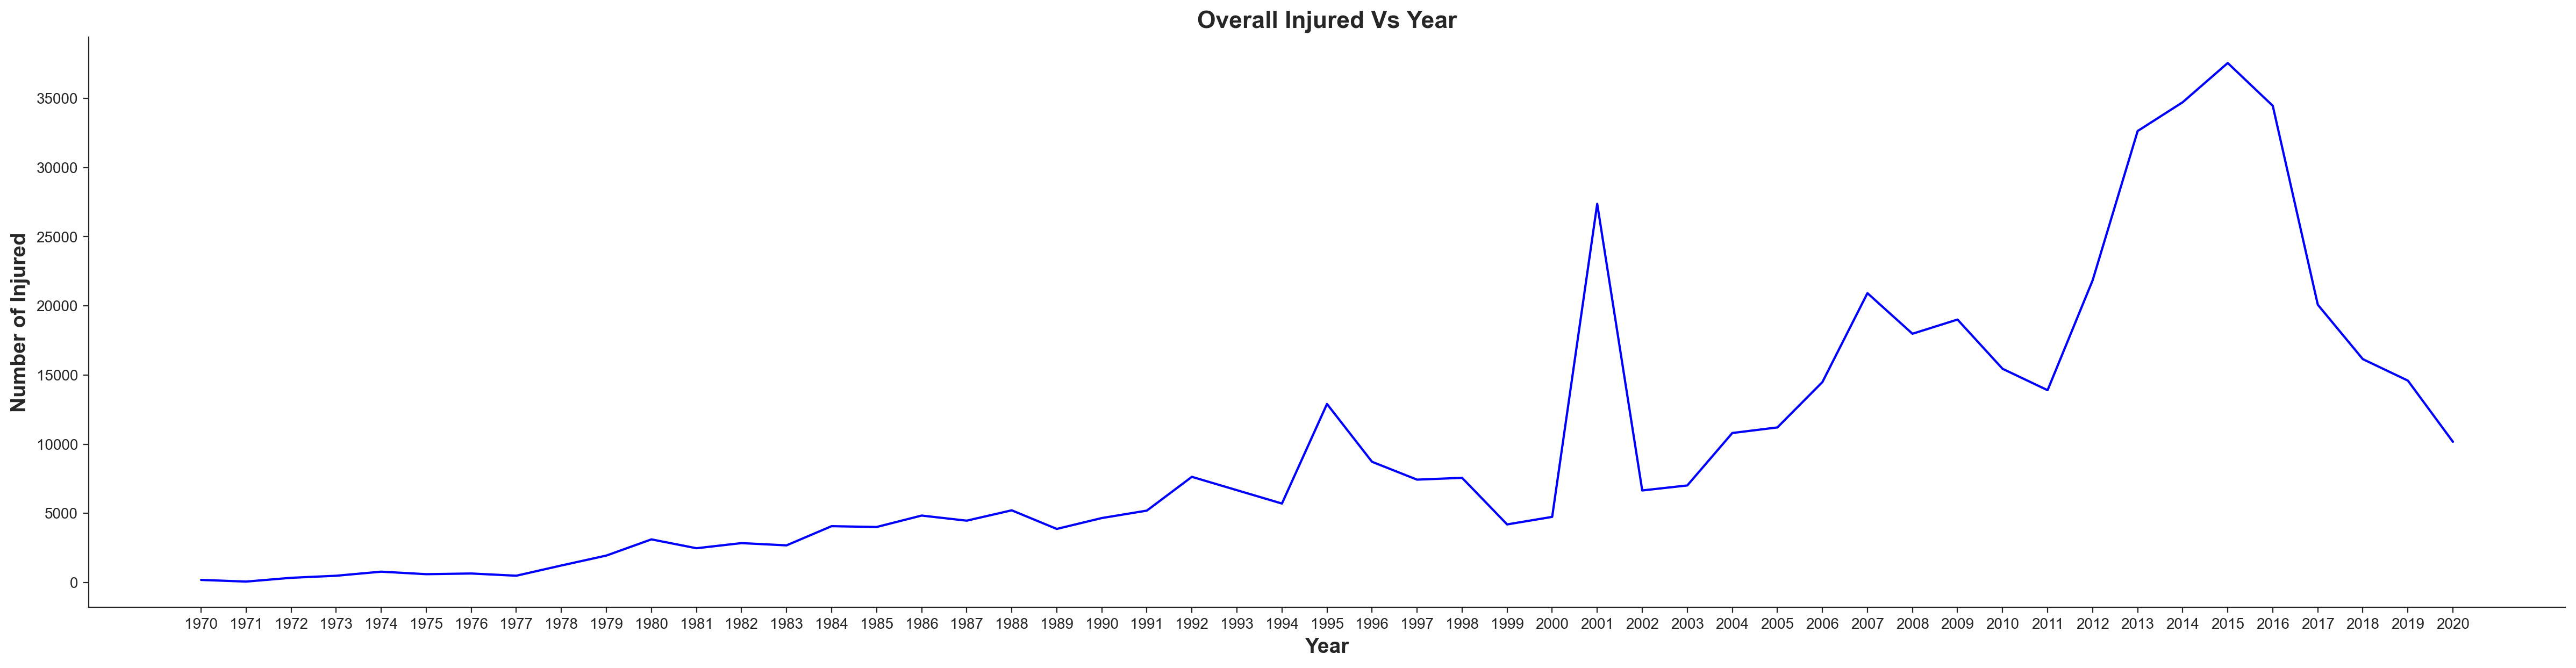

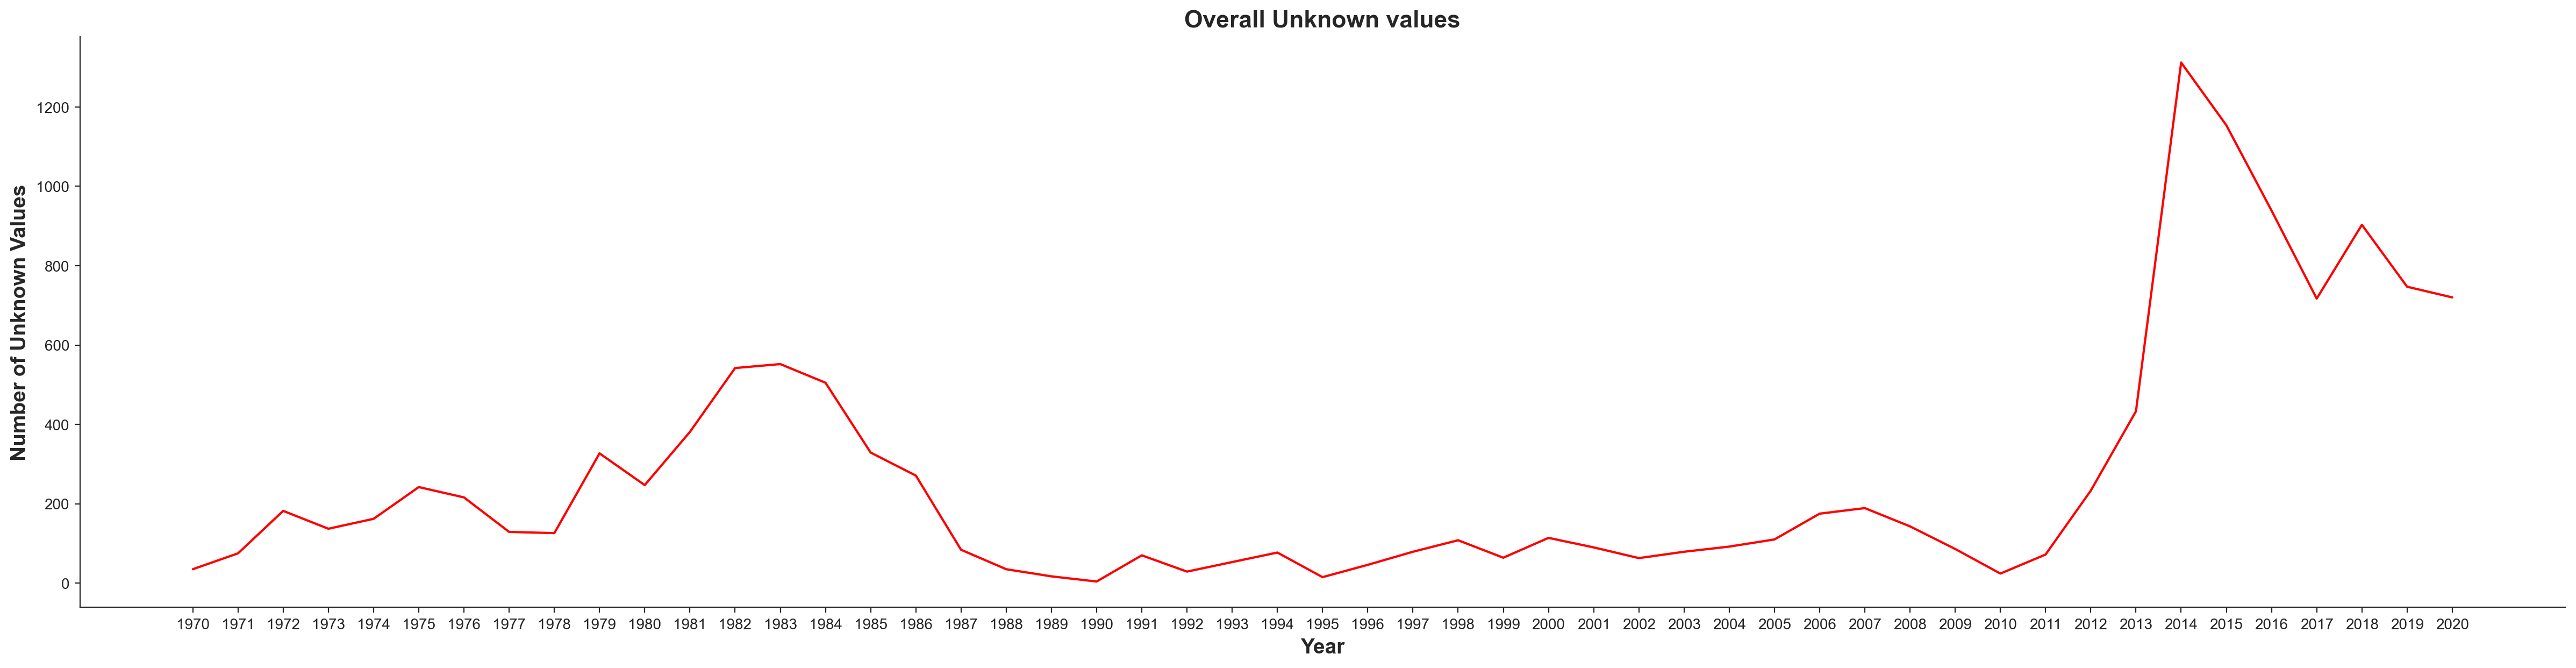

In [74]:
## Discarding Missing values in "Total Number of Injured" column

year_num_per_cap = df[(df['Total Number of Injured'] != -99) & (df['Doubt if Terrorism?'] == 'No')].\
groupby('Year')['Total Number of Injured'].sum()  ## Summing the total number of fatalities for each year

sns.relplot(x='Year', y=year_num_per_cap.values, kind='line', data=year_num_per_cap, height = 6, aspect=4, color='blue')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Injured', fontweight='bold', fontsize=14)
plt.title('Overall Injured Vs Year',fontsize=16, fontweight='bold')
plt.show()

## Looking at missing value years

year_num_per_cap_missing = df[(df['Total Number of Injured'] == -99) & (df['Doubt if Terrorism?'] == 'No')].groupby('Year')['Year'].count()
sns.relplot(x='Year', y=year_num_per_cap_missing.values, kind='line', data=year_num_per_cap_missing, height = 6, aspect=4, color='red')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Unknown Values', fontweight='bold', fontsize=14)
plt.title('Overall Unknown values',fontsize=16, fontweight='bold')
plt.show()

- Overall three numerical columns, <u>**"Number of Perpetrators Captured", "Total Number of Fatalities" and "Total Number of Injured" seem to be highest for year 2014**<\u>. We will dive deeper into the year 2014 attacks and look closer.

In [86]:
cols = list(df.columns)    ## Basically we need to take care for for -99 (missing value) when working with these columns

for i in cols:
    if -99 in df[i].values:
        print(f'{i} : Yes')
        print('')

Number of Perpetrators Captured : Yes

Total Number of Fatalities : Yes

Number of US Fatalities : Yes

Number of Perpetrator Fatalities : Yes

Total Number of Injured : Yes

Number of US Injured : Yes

Number of Perpetrators Injured : Yes

